## 安裝套件

In [2]:
!pip install requests

In [3]:
!pip install feedparser

In [4]:
!pip install lxml

In [5]:
!pip install jieba

### 下載繁體字的辭典檔

In [6]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -O jieba_data/dict.txt.big

--2022-01-07 13:55:37--  https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big [following]
--2022-01-07 13:55:38--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘jieba_data/dict.txt.big’

jieba_data/dict.txt 100%[===================>]   8.18M  11.2MB/s    in 0.7s    

2022-01-07 13:55:39 (11.2 MB/s) - ‘jieba_data/dict.txt.big’ saved [8583143/8583143]



In [7]:
!pip install wordcloud

## 解析 RSS

In [8]:
import feedparser

In [9]:
#rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"

In [10]:
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money"

In [11]:
newsFeed = feedparser.parse(rss_url)
newsFeed

{'bozo': False,
 'entries': [{'title': '填補歐洲天然氣需求缺口 美國LNG出口創歷史新高',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money',
    'value': '填補歐洲天然氣需求缺口 美國LNG出口創歷史新高'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://money.udn.com/money/story/5599/6016612'}],
   'link': 'https://money.udn.com/money/story/5599/6016612',
   'published': 'Fri, 07 Jan 2022 13:46:26 +0800',
   'published_parsed': time.struct_time(tm_year=2022, tm_mon=1, tm_mday=7, tm_hour=5, tm_min=46, tm_sec=26, tm_wday=4, tm_yday=7, tm_isdst=0),
   'summary': '因歐洲需求高漲，美國液化天然氣（LNG）12月出口創下歷史新高，冬季供應吃緊勢必讓LNG訂單維持不墜。',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money',
    'value': '因歐洲需求高漲，美國液化天然氣（LNG）12月出口創下歷史新高，冬季供應吃緊勢必讓LNG訂單維持不墜。'},
   'id': 'https://money.udn.com/money/story/5599/6016612',
   'guidislink': False},
  {'title': 

### 查看每個 entry 的 title, url 

In [12]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

1, 填補歐洲天然氣需求缺口 美國LNG出口創歷史新高, https://money.udn.com/money/story/5599/6016612
2, 王毅：將任命非洲之角特使 對非洲重心轉為貿易, https://money.udn.com/money/story/5599/6016608
3, 塞港讓海運變貴 歐洲和中國大陸之間長程鐵路運輸變夯, https://money.udn.com/money/story/5599/6016603
4, 日本靴下屋創辦人夫婦 穿越馬路遭小貨車撞死, https://money.udn.com/money/story/5599/6016578
5, 哈薩克動亂 全球最大鈾礦商稱不受影響, https://money.udn.com/money/story/5599/6016525
6, 三星電子估Q4獲利大增52.5% 銷售業績創新高, https://money.udn.com/money/story/5599/6016530
7, 緩解對中國大陸緊張關係 立陶宛總統請外長提具體計畫, https://money.udn.com/money/story/5599/6016431
8, 官署被佔員警被斬 哈薩克動亂數十死2000人被捕, https://money.udn.com/money/story/5599/6016388
9, 二戰士兵家書「76年後才寄達」！家屬反應曝光超催淚, https://money.udn.com/money/story/5599/6016372
10, Google的Nest揚聲器被判侵害Sonos專利 禁部分產品輸美, https://money.udn.com/money/story/5599/6016344
11, 立陶宛外交部：台灣代表處設立都與總統協調過, https://money.udn.com/money/story/5599/6016324
12, 駐日美軍疫情擴大 日外相2加2會談籲美嚴格防疫, https://money.udn.com/money/story/5599/6016292
13, 沖繩疫情急速惡化 估單日新增逾1400例創新高, https://money.udn.com/money/story/5599/6016223
14, 國會暴動一周年 

### 解析html可以參考 https://lxml.de/lxmlhtml.html

## 開始取得文章

### 載入 library

In [13]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

### 使用繁體辭典

In [14]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt.big')

### 設定 request header

In [15]:
#設定 request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

### 先爬文

In [16]:
#爬文
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/5599/6016612
sleep time: 9 sec
https://money.udn.com/money/story/5599/6016608
sleep time: 5 sec
https://money.udn.com/money/story/5599/6016603
sleep time: 10 sec
https://money.udn.com/money/story/5599/6016578
sleep time: 8 sec
https://money.udn.com/money/story/5599/6016525
sleep time: 4 sec
https://money.udn.com/money/story/5599/6016530
sleep time: 7 sec
https://money.udn.com/money/story/5599/6016431
sleep time: 3 sec
https://money.udn.com/money/story/5599/6016388
sleep time: 5 sec
https://money.udn.com/money/story/5599/6016372
sleep time: 4 sec
https://money.udn.com/money/story/5599/6016344
sleep time: 5 sec
https://money.udn.com/money/story/5599/6016324
sleep time: 9 sec
https://money.udn.com/money/story/5599/6016292
sleep time: 6 sec
https://money.udn.com/money/story/5599/6016223
sleep time: 4 sec
https://money.udn.com/money/story/5599/6016206
sleep time: 7 sec
https://money.udn.com/money/story/5599/6016205
sleep time: 4 sec
https://money.udn.com/mo

'因歐洲需求高漲，美國液化天然氣（LNG）12月出口創下歷史新高，冬季供應吃緊勢必讓LNG訂單維持不墜。路孚特（Refinitiv）和美國能源信息署(EIA)的數據顯示，上個月美國LNG創紀錄出口量中有一半運往歐洲，高於2021年早先的37%。美國LNG出口增長，反映出家庭取暖和工業燃料的需求飆升，乖將歐洲和亞洲LNG價格推至新高價位。美國供應充裕且賺廉，因為過去20年美國頁岩油氣的繁榮使國內產量比需求高出約10%。船隻追蹤數據顯示，上個月有106艘船隻運輸約715萬噸LNG，與上年同期89艘船隻運輸614萬噸相比，增長16%。超過5月所創造651萬噸的最高記錄。歐洲基準的荷蘭天然氣價格自12月末以來有助降溫，消除了相對亞洲的溢價。周三，衡量亞洲現貨天然氣價格的日韓基準(JKM)價格報每英國熱能部單位（BTU）34.19美元，較歐洲溢價約4美元。知情人士說，本月有兩批原本運往歐洲的LNG船貨改道，其中一批運往亞洲。這與去年年底的情況相反，當時至少有10批原本運往亞洲的船貨在價差吸引下改道至歐洲。中國外長王毅今天宣布，中國將任命非洲之角事務特使以促進區域和平，同時對非洲大陸重心將從基礎建設轉為貿易。他說，「從來不是中國想做什麼，而是非洲想做什麼」。自2020年底以來，衣索比亞叛軍「泰格瑞人民解放陣線」（TPLF）已和總理阿比（Abiy Ahmed）領導的聯邦政府鏖戰1年多，肯亞一直積極參與停止衣索比亞內戰的外交努力。王毅今天訪問肯亞做出以上宣布。在訪問肯亞前，王毅訪問了厄利垂亞。厄利垂亞與衣索比亞北部提格雷（Tigray）地區接壤，一直是阿比政府的盟友，共同對抗「泰格瑞人民解放陣線」，厄利垂亞也因此捲入這場造成數千人喪命、數十萬人流離失所與常鬧饑荒的衝突中。路透社報導，王毅透過翻譯在肯亞港市蒙巴薩（Mombasa）的記者會上說：「為形成政治共識，協調共同行動。中方願任命外交部非洲之角事務特使，為這一進程提供必要支持。」王毅並說：「建議地區國家召開非洲之角和平會議，通過平等協商，把地區的命運掌握在自己手中。」中國向來較關注非洲的經濟發展和貿易，而不是政治和外交議題。王毅未進一步闡述特使將扮演的角色。王毅也表示將協助厄利垂亞的紅海海岸線開發，但也未進一步說明細節。肯亞外長歐馬莫（Rachel Omamo）今天表示，中國與肯亞簽署6項協議，其一是允許肯亞農民向中國出口新鮮酪

### 做分詞

In [17]:
#分詞
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from /home/jovyan/work/Text_wordcloud/jieba_data/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u240ff8c1e70462be159af457c3f6d652.cache
Loading model cost 1.408 seconds.
Prefix dict has been built successfully.


['因',
 '歐洲',
 '需求',
 '高漲',
 '，',
 '美國',
 '液化',
 '天然氣',
 '（',
 'LNG',
 '）',
 '12',
 '月',
 '出口',
 '創下',
 '歷史',
 '新高',
 '，',
 '冬季',
 '供應',
 '吃緊',
 '勢必',
 '讓',
 'LNG',
 '訂單',
 '維持',
 '不墜',
 '。',
 '路孚特',
 '（',
 'Refinitiv',
 '）',
 '和',
 '美國能源',
 '信息',
 '署',
 '(',
 'EIA',
 ')',
 '的',
 '數據',
 '顯示',
 '，',
 '上個月',
 '美國',
 'LNG',
 '創紀錄',
 '出口量',
 '中有',
 '一半',
 '運往',
 '歐洲',
 '，',
 '高於',
 '2021',
 '年',
 '早先',
 '的',
 '37%',
 '。',
 '美國',
 'LNG',
 '出口',
 '增長',
 '，',
 '反映',
 '出',
 '家庭',
 '取暖',
 '和',
 '工業',
 '燃料',
 '的',
 '需求',
 '飆升',
 '，',
 '乖將',
 '歐洲',
 '和',
 '亞洲',
 'LNG',
 '價格',
 '推至',
 '新',
 '高價位',
 '。',
 '美國',
 '供應',
 '充裕',
 '且',
 '賺',
 '廉',
 '，',
 '因為',
 '過去',
 '20',
 '年',
 '美國',
 '頁岩',
 '油氣',
 '的',
 '繁榮',
 '使',
 '國內',
 '產量比',
 '需求',
 '高出',
 '約',
 '10%',
 '。',
 '船隻',
 '追蹤',
 '數據',
 '顯示',
 '，',
 '上個月',
 '有',
 '106',
 '艘',
 '船隻',
 '運輸',
 '約',
 '715',
 '萬噸',
 'LNG',
 '，',
 '與',
 '上年',
 '同期',
 '89',
 '艘',
 '船隻',
 '運輸',
 '614',
 '萬噸',
 '相比',
 '，',
 '增長',
 '16%',
 '。',
 '超過',
 '5',
 '月',
 '所',
 '創造',
 '

In [18]:
!ls jieba_data

dict.txt.big  mydict.txt  stop_words.txt


### 準備 stop word

In [70]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否',
 '(',
 ')',
 '[',
 ']',
 '《',
 '》',
 '；',
 '『',
 '』',
 '：',
 ' ',
 '’',
 '（',
 '）',
 '、',
 '」',
 '「',
 '。',
 '，',
 '在',
 '他',
 '日',
 '對',
 '有',
 '已',
 '年',
 '月',
 '也',
 '為',
 '時',
 '表示',
 '後',
 '不',
 '6',
 '2',
 '報導',
 '但',
 '今天',
 '被',
 '將',
 '，',
 '。',
 '人',
 '以',
 '說',
 '目前']

### 準備一個利用stop word過濾後的分詞結果

In [71]:
#分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['因',
 '歐洲',
 '需求',
 '高漲',
 '美國',
 '液化',
 '天然氣',
 'LNG',
 '12',
 '出口',
 '創下',
 '歷史',
 '新高',
 '冬季',
 '供應',
 '吃緊',
 '勢必',
 '讓',
 'LNG',
 '訂單',
 '維持',
 '不墜',
 '路孚特',
 'Refinitiv',
 '美國能源',
 '信息',
 '署',
 'EIA',
 '數據',
 '顯示',
 '上個月',
 '美國',
 'LNG',
 '創紀錄',
 '出口量',
 '中有',
 '一半',
 '運往',
 '歐洲',
 '高於',
 '2021',
 '早先',
 '37%',
 '美國',
 'LNG',
 '出口',
 '增長',
 '反映',
 '出',
 '家庭',
 '取暖',
 '工業',
 '燃料',
 '需求',
 '飆升',
 '乖將',
 '歐洲',
 '亞洲',
 'LNG',
 '價格',
 '推至',
 '新',
 '高價位',
 '美國',
 '供應',
 '充裕',
 '且',
 '賺',
 '廉',
 '因為',
 '過去',
 '20',
 '美國',
 '頁岩',
 '油氣',
 '繁榮',
 '使',
 '國內',
 '產量比',
 '需求',
 '高出',
 '約',
 '10%',
 '船隻',
 '追蹤',
 '數據',
 '顯示',
 '上個月',
 '106',
 '艘',
 '船隻',
 '運輸',
 '約',
 '715',
 '萬噸',
 'LNG',
 '上年',
 '同期',
 '89',
 '艘',
 '船隻',
 '運輸',
 '614',
 '萬噸',
 '相比',
 '增長',
 '16%',
 '超過',
 '5',
 '所',
 '創造',
 '651',
 '萬噸',
 '最高',
 '記錄',
 '歐洲',
 '基準',
 '荷蘭',
 '天然氣',
 '價格',
 '自',
 '12',
 '月末',
 '以來',
 '有助',
 '降溫',
 '消除',
 '相對',
 '亞洲',
 '溢價',
 '周三',
 '衡量',
 '亞洲',
 '現貨',
 '天然氣',
 '價格',
 '日韓',
 '基準',
 'JKM',
 '價格',


### 載入繪圖相關的 library

In [72]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

/opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


### 繪製文字雲 ( wordcloud.generate )

In [73]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_words_list)
#seg_words

### 繪製文字雲 ( wordcloud.generate_from_frequencies )

In [74]:
# https://docs.python.org/zh-tw/3/library/collections.html
# 準備一個沒有經過
# stop word 處理的 counter
from collections import Counter
seg_counter = Counter(seg_words_list)
seg_counter

Counter({'因': 6,
         '歐洲': 12,
         '需求': 5,
         '高漲': 1,
         '，': 448,
         '美國': 22,
         '液化': 1,
         '天然氣': 3,
         '（': 90,
         'LNG': 7,
         '）': 90,
         '12': 3,
         '月': 16,
         '出口': 8,
         '創下': 2,
         '歷史': 2,
         '新高': 5,
         '冬季': 1,
         '供應': 2,
         '吃緊': 1,
         '勢必': 1,
         '讓': 4,
         '訂單': 1,
         '維持': 3,
         '不墜': 1,
         '。': 232,
         '路孚特': 1,
         'Refinitiv': 1,
         '和': 31,
         '美國能源': 1,
         '信息': 1,
         '署': 4,
         '(': 2,
         'EIA': 1,
         ')': 2,
         '的': 251,
         '數據': 5,
         '顯示': 5,
         '上個月': 2,
         '創紀錄': 2,
         '出口量': 1,
         '中有': 2,
         '一半': 1,
         '運往': 4,
         '高於': 1,
         '2021': 7,
         '年': 30,
         '早先': 1,
         '37%': 1,
         '增長': 2,
         '反映': 2,
         '出': 1,
         '家庭': 1,
         '取暖': 1,
         '

In [75]:
# 準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter

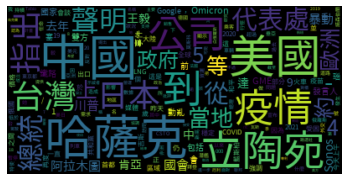

In [76]:
#有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()